<a href="https://colab.research.google.com/github/shaid03/Machine-Learning/blob/main/1_2_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Data cleaning and pre processing***

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
# df = fetch_openml('titanic', version=1, as_frame=True)['data']
df = fetch_openml('titanic', version=1, as_frame=True, parser='auto')['data']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


In [5]:
df.isnull()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,True,False,True,True,True


In [6]:
# sum overall null value
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
import seaborn as sns

<Axes: title={'center': 'Missing value percantage'}, ylabel='percentage'>

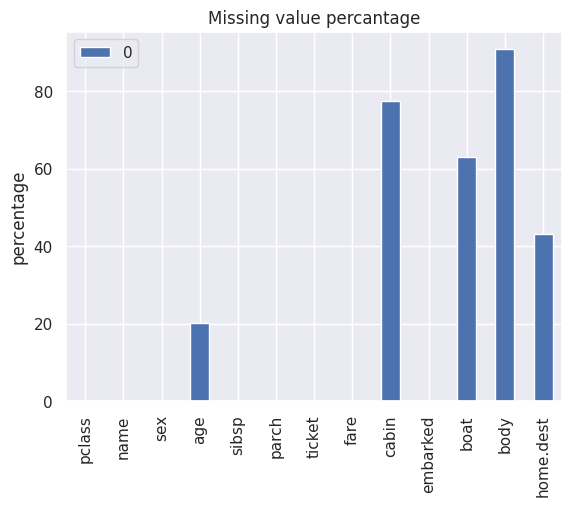

In [8]:
sns.set()
missing_val_per = pd.DataFrame((df.isnull().sum()/len(df))*100)
missing_val_per.plot(kind='bar', title = 'Missing value percantage', ylabel = 'percentage')

In [9]:
print(f"size of dataset: {df.shape}")

size of dataset: (1309, 13)


In [10]:
# how to droping column
df.drop(['body'],axis=1,inplace=True)
print(f"size of dataset after dropping features: {df.shape}")

size of dataset after dropping features: (1309, 12)


In [11]:
# value imputation
# Deleting features are never favored since vby eliminating a column, we are losing one factor that produces the outcomes or contributes to the output. this will eventually lead to generalization error
# Simpletmputer is a very convenient strategy for missing data imputation, it replaces all missing values with a statistic calculated from the other values in a column. used statistic: mean, medium, mode
from sklearn.impute import SimpleImputer

In [12]:
# null value in age before imputer
print(f"Number of null value before imputer: {df.age.isnull().sum()}")

Number of null value before imputer: 263


In [13]:
# null value in age after imputer
imp = SimpleImputer(strategy='mean')
df['age'] = imp.fit_transform(df[['age']])
print(f"Number of null value after imputer: {df.age.isnull().sum()}")

Number of null value after imputer: 0


In [14]:
# now let me do how to impute the missing data on whole dataset
def get_parameters(df):
  parameters = {}
  for col in df.columns[df.isnull().any()]:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64' or df[col].dtype == 'int32':
      strategy = 'mean'
    else:
      strategy = 'most_frequent'
    missing_values = df[col][df[col].isnull()].values[0]
    parameters[col] = {'missing_value':missing_values, 'strategy': strategy}
  return parameters

get_parameters(df)

{'fare': {'missing_value': nan, 'strategy': 'mean'},
 'cabin': {'missing_value': nan, 'strategy': 'most_frequent'},
 'embarked': {'missing_value': nan, 'strategy': 'most_frequent'},
 'boat': {'missing_value': nan, 'strategy': 'most_frequent'},
 'home.dest': {'missing_value': nan, 'strategy': 'most_frequent'}}

In [15]:
parameters = get_parameters(df)

In [16]:
for col, param in parameters.items():
  missing_values = param['missing_value']
  strategy = param['strategy']
  imp = SimpleImputer(missing_values=missing_values, strategy=strategy)
  df[col] = imp.fit_transform(df[[col]])

In [17]:
df.isnull().sum()

pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
home.dest    0
dtype: int64

Feature Engineering

In [18]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,13,"Montreal, PQ / Chesterville, ON"
